<a href="https://colab.research.google.com/github/Vladzzkuznetsov/statistical_experiments_with_samples/blob/main/razmer_k_october.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Импорт библиотек

In [ ]:
import pandas as pd
import numpy as np
import random
random.seed(42)

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


mpl.style.use('dark_background')

plt.style.use('default')

#Постановка эксперимента

Основные предпосылки эксперимента.
Для проведения натурных испытаний производятся заливка образцов (балок к примеру) параллельно с ними происходит заливка образцов "кубиков" для испытаний. После достижения прочности железобетонные образцы испытывают (обычно с разницей в 1 - 2  дня, чтобы исключить возрастание прочноссти образцов).
Ситуация следующая - основное предпоолжение что кубик 150х150 залитый из одного и того же замеса при одноосном сжатии работает аналогично бетонной части образца (в данном случае балки ). Предположение имеет под собой обоснования следующего характера
*   Ищготовленные образцы соответствуют ГОСТ
*   Испытания всех образцов проведены по ГОСТ
*   Отличия в прочности полученные при испытании нескольких образцов кубической формы считать незначительными.
*   При возникновении сильных отклонений в результатах испытаний признать эксперимент неудачным
*   и т.д.

Из ГОСТ 10180-90 с.11
Прочность бетона тяжелого бетона в серии образцов определяют как среднее значение по полученнной серии:
- При испытании двух образцов — всем образцам образцам;
- При испытании трех образцов — по двум выбранным по наибольшему значению порчности;
- При испытании четырех образцов — по трем образцам выбранным по наибольшему значению порчности;
- При испытании шести образцов — по четырем образцам выбранным по наибольшему значению порчности.

Эти и многие другие предпосылки создают ситуации при которых диограмма деформирования "кубика" и диограмма деформирования балочного (в данной ситуации) образца стремятся к равенству.
С точки зрения эксперимента так и должно быть.

При этом, логично предположить что повысив количество экспериментов до внушительной цифры допустим 100 или 1000 образоцов мы получим более точные данные для обработки, очистки, работы с ними и выводов по полученным результатам анализа. Однако подобное приведет к кратному увеличению стоимости эксперимента.
К примеру, мы изготавливаем 2 "кубика" балку из группыы А с типом армирования 1, и балку из группыы Б с типом армирования 2. Для получения эксперимента у нас 3 балки группы А, 3 балки группы Б и 6 кубиков.
При проведении анализа мы расчитываем диограмму деформирования бетонной части сечения образцов обеих групп по "кубикам" т.е. делаем предположение о условном  равенстве или незначительном отклонении которыми можно пренебречь характеристик бетона в 3 местах в балке А в балке Б и в кубическом образце.

Предположение состоит в следующем, что при выпиливании образцов из неразрушенных в результате эксперимента балочных элементов (к примеру, приопорыне зоны балочных образцов разрушенных по нормальным сечениям) можно использовать для увеличения количества образцов в серии.

При проведении подобного требуется соблюдение требований ГОСТ 10180-90 "Методы определения прочности по контрольным образцам".
Кроме этого существуют методы неразрушающего контроля такие как молотка Кашкарова которые могут существенно уточнить значение максимальной прочности бетона при сжатии, при этом определить его с достаточной точностью.
Однако методы неразрушающего контроля не предоставляют ценного для проведения нелинейных расчетов графика деформирования материала что является существенным минусом в данной ситуации.

При проведении эксперимента может возникнуть следующая ситуация:
*   Произошло изготовление n1 количества образцов из первой группы и n2 из второй;
*   Произведена оценка 2 выборок по критериям t-критерий Стьюдента и U-критерий Манна — Уитни;
*   Требуется оценить результаты и выбрать один из критериев (при их возможной разнице) а так же оценить с мощьность проведенных тестов

Для оценки результатов эксперимента будет просимулирован следующий численный эксперимент:
*   Имеется 2 нормальных распределения прочности бетонных образцов с заданными коэффициентами вариации и вычисленными среднеквадратичными отклонениями;
*   Внутирисерийный коэффициент вариации по прочности бетона принят по  ГОСТ 10180-90 с.12 (формулы 5 - 8);
*   Имеется различие в средних величинах 2 нормальных распределений. Значение группы А и Б принято по таблице 6.7 СП 63.13330.2018 как для бетонов марки В20 и В25 соответственно;
*   Осуществлен переход по формуле(5.1) СП 52-110-2009 от номативной призменной прочности бетона на сжатие к кубиковой прочности бетона "полученной" при проведении эксперимента;
*   Проведена симуляция результатов для оценки по критериям t-критерий Стьюдента и U-критерий Манна — Уитни;
*   Проведены тесты по различиям А и Б групп.


In [ ]:
"МЕТОДЫ ОПРЕДЕЛЕНИЯ ПРОЧНОСТИ ПО КОНТРОЛЬНЫМ ОБРАЗЦАМ".lower()

'методы определения прочности по контрольным образцам'

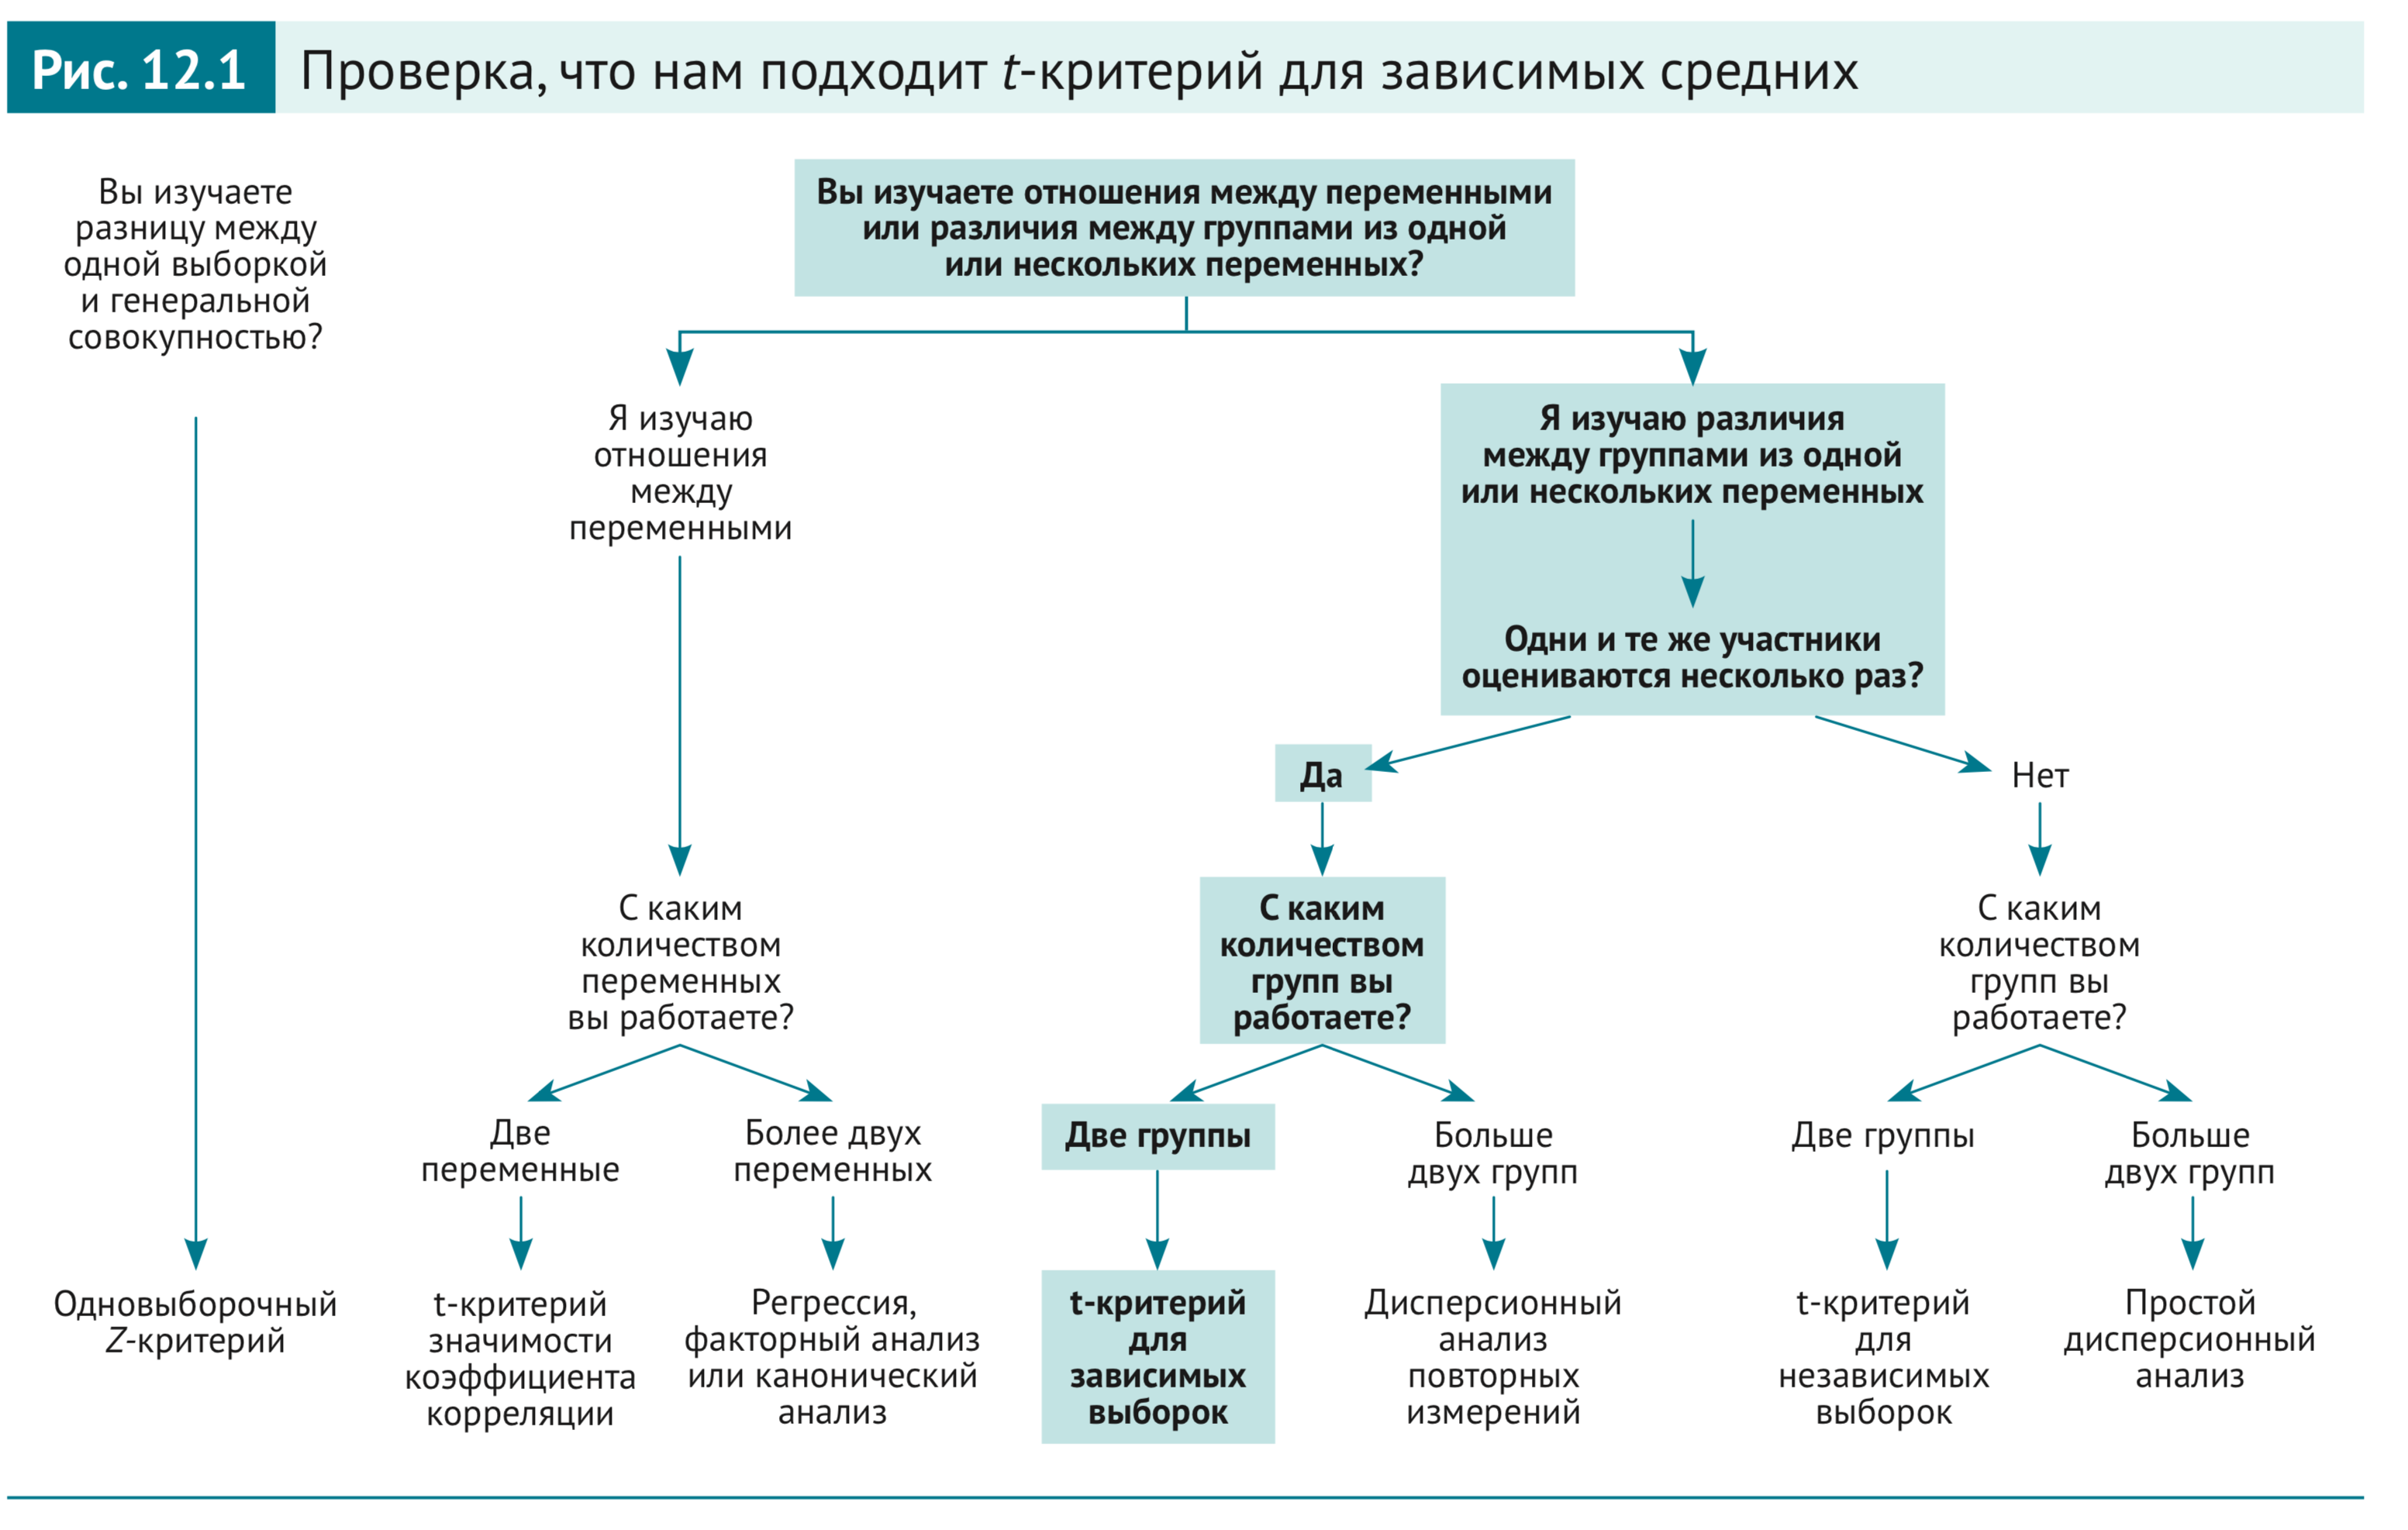

#Подготовка данных

In [ ]:
from scipy import stats
import math
from statsmodels.stats.power import TTestIndPower

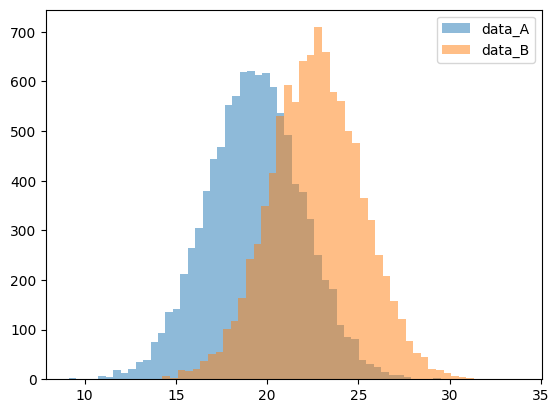

In [ ]:
df = pd.DataFrame()
mu_A, mu_B = 15, 18.5
sigma_A, sigma_B = 0.1732* mu_A , 0.135* mu_B
np.random.seed(42)
data_A = np.random.normal(1.66,1,10_000)*sigma_A + mu_A
data_B = np.random.normal(1.66,1,10_000)*sigma_B + mu_B

df['data_A'] = data_A
df['data_B'] = data_B

plt.hist(df['data_A'], bins=50, alpha=0.5, label='data_A')
plt.hist(df['data_B'], bins=50, alpha=0.5, label='data_B')
plt.legend(loc='upper right')
plt.show()

In [ ]:
sigma_A

2.598

In [ ]:
data_A.mean()

19.307130715208828

In [ ]:
np.percentile(data_A, 5)

15.013358370202038

In [ ]:
np.percentile(data_A, 95)

23.58043593837005

In [ ]:
round(data_A.std(ddof = 0)/ data_A.mean()*100,2)

13.5

In [ ]:
df.head()

,data_A,data_B
0,20.603143,20.951309
1,18.953469,21.882865
2,20.995375,21.153891
3,23.269512,22.921619
4,18.704350,25.635803


In [ ]:
def print_interval(data, alpha = 0.95):
  df = len(data)-1
  loc = np.mean(data)
  scale = stats.sem(data)
  t_interval = stats.t.interval(alpha=alpha, df=df, loc=loc, scale=scale) 
  print(f'Существует доля {alpha}, что доверительный t_interval {t_interval} содержит истинную среднюю')
  norm_interval = stats.norm.interval(alpha=alpha, loc=loc, scale=scale) 
  print(f'Существует доля {alpha}, что доверительный norm_interval {norm_interval} содержит истинную среднюю')

In [ ]:
print_interval(data_A, alpha = 0.95)

Существует доля 0.95, что доверительный t_interval (19.256028361090614, 19.358233069327042) содержит истинную среднюю
Существует доля 0.95, что доверительный norm_interval (19.256034546945024, 19.358226883472632) содержит истинную среднюю


In [ ]:
import pylab
import statsmodels.api as sm

In [ ]:
df['data_A'] = round(df['data_A'] ,3)
df['data_B'] = round(df['data_B'] ,3)
df['data_A_z'] = round((df['data_A'] -mu_A)/sigma_A - 1.66,3)
df['data_B_z'] = round((df['data_B'] -mu_B)/sigma_B - 1.66,3)
df.head()

,data_A,data_B,data_A_z,data_B_z
0,20.603,20.951,0.497,-0.679
1,18.953,21.883,-0.138,-0.305
2,20.995,21.154,0.648,-0.597
3,23.270,22.922,1.523,0.111
4,18.704,25.636,-0.234,1.197


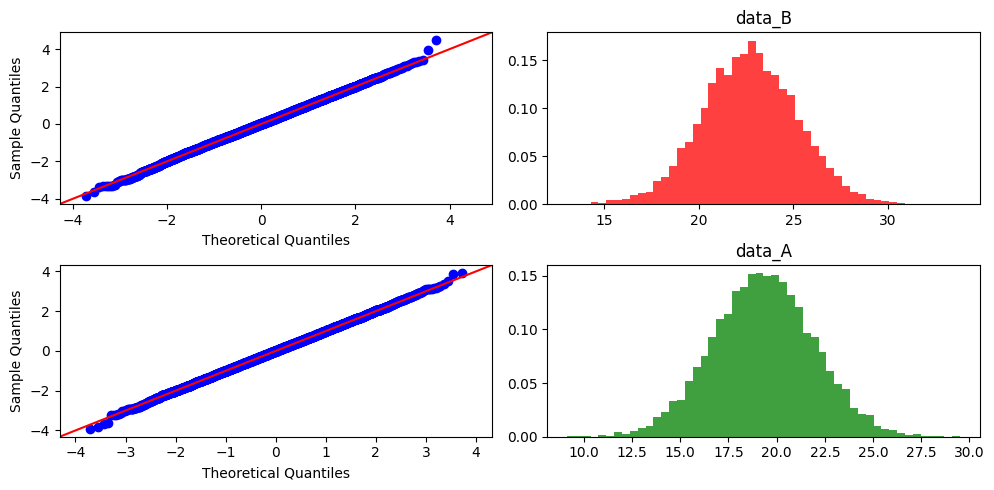

In [ ]:
fig = plt.figure(figsize=(10, 5))

ax = fig.add_subplot(2, 2, 1)
sm.graphics.qqplot(df['data_B_z'], line ='45', ax=ax)

ax = fig.add_subplot(2, 2, 2)
ax.hist(df['data_B'], 50, density=True, facecolor='r', alpha=0.75)
ax.set_title("data_B")

ax = fig.add_subplot(2, 2, 3)
sm.graphics.qqplot(df['data_A_z'], line ='45', ax=ax)

ax = fig.add_subplot(2, 2, 4)
ax.hist(df['data_A'], 50, density=True, facecolor='g', alpha=0.75)
ax.set_title("data_A")

fig.tight_layout()

#Симуляция

In [ ]:
from tqdm.auto import tqdm

In [ ]:
# n_N = [2,3,4,6]
# df_exp = pd.DataFrame()
# total_trials = 10000
# seed_i = 0
# for i in tqdm(range(total_trials)):
#     np.random.seed(seed_i)
#     random.seed(seed_i)
#     seed_i += 1
#     daily_2 = np.array( random.sample(list(data_A), 2) )
#     np.random.seed(seed_i)
#     random.seed(seed_i)
#     seed_i += 1
#     daily_3 = np.array( random.sample(list(data_A), 3) )
#     np.random.seed(seed_i)
#     random.seed(seed_i)
#     seed_i += 1
#     daily_4 = np.array( random.sample(list(data_A), 4) )
#     np.random.seed(seed_i)
#     random.seed(seed_i)
#     seed_i += 1
#     daily_6 = np.array( random.sample(list(data_A), 6) )

#     daily_2.sort()
#     daily_3.sort()
#     daily_4.sort()
#     daily_6.sort()

#     mean_daily_2 = daily_2.mean()
#     mean_daily_3 = daily_3[1:].mean()
#     mean_daily_4 = daily_4[1:].mean()
#     mean_daily_6 = daily_6[2:].mean()


#     add_df = {'mean_daily_2': round(mean_daily_2,4),
#               'mean_daily_3': round(mean_daily_3,4),
#               'mean_daily_4': round(mean_daily_4,4),
#               'mean_daily_6': round(mean_daily_6,4),
#               'ptp_mean_daily_2': round(np.ptp(daily_2),4),
#               'ptp_mean_daily_3': round(np.ptp(daily_3),4),
#               'ptp_mean_daily_4': round(np.ptp(daily_4),4),
#               'ptp_mean_daily_6': round(np.ptp(daily_6),4),
#               }
#     df_exp = df_exp.append(add_df, ignore_index = True)


In [ ]:
# df_exp.head()

In [ ]:
# df_exp.to_csv('df_exp_values_2_3_4_6.csv', index=False)

In [ ]:
x = np.array([1, 2, 2.5,5,45,22])
right_x = x[ x <= x.mean()]
right_x

array([1. , 2. , 2.5, 5. ])

#Анализ полученных данных

https://drive.google.com/file/d/17XToMuKGJ9CY7OAVaqhzV6uHM24ENtk9/view?usp=sharing

In [ ]:
! gdown 17XToMuKGJ9CY7OAVaqhzV6uHM24ENtk9

Downloading...
From: https://drive.google.com/uc?id=17XToMuKGJ9CY7OAVaqhzV6uHM24ENtk9
To: /content/df_exp_values_2_3_4_6.csv
100% 593k/593k [00:00<00:00, 87.3MB/s]


In [ ]:
df = pd.read_csv('/content/df_exp_values_2_3_4_6.csv')
df.head()

,mean_daily_2,mean_daily_3,mean_daily_4,mean_daily_6,ptp_mean_daily_2,ptp_mean_daily_3,ptp_mean_daily_4,ptp_mean_daily_6
0,22.2003,20.6235,19.9011,21.2720,0.5230,2.1774,4.3435,7.3733
1,23.3479,22.0959,19.9919,22.0304,0.5218,2.3683,4.1012,8.6938
2,21.7546,19.3120,20.8800,20.2407,0.3779,8.2980,6.8192,7.5396
3,19.5953,20.7194,20.2503,19.0858,2.5653,3.3390,10.3346,5.1388
4,20.1246,19.8920,20.9577,20.2821,1.1978,2.4634,5.0609,7.8705


In [ ]:
df[['mean_daily_2','mean_daily_3','mean_daily_4','mean_daily_6']].describe()

,mean_daily_2,mean_daily_3,mean_daily_4,mean_daily_6
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,19.327992,20.415764,20.205136,20.542368
std,1.823805,1.638168,1.357212,1.154057
min,12.199400,13.634300,15.104400,16.374600
25%,18.112925,19.299775,19.301375,19.748700
50%,19.297550,20.402550,20.179600,20.539000
75%,20.564300,21.515850,21.118600,21.318350
max,26.993100,27.545600,25.262600,25.215600


In [ ]:
mu_mean_daily_2 = df['mean_daily_2'].mean()
mu_mean_daily_3 = df['mean_daily_3'].mean()
mu_mean_daily_4 = df['mean_daily_4'].mean()
mu_mean_daily_6 = df['mean_daily_6'].mean()

sigma_mean_daily_2 = df['mean_daily_2'].std()
sigma_mean_daily_3 = df['mean_daily_3'].std()
sigma_mean_daily_4 = df['mean_daily_4'].std()
sigma_mean_daily_6 = df['mean_daily_6'].std()

df['mean_daily_2_z'] = round((df['mean_daily_2'] - mu_mean_daily_2)/sigma_mean_daily_2,3)
df['mean_daily_3_z'] = round((df['mean_daily_3'] - mu_mean_daily_3)/sigma_mean_daily_3,3)
df['mean_daily_4_z'] = round((df['mean_daily_4'] - mu_mean_daily_4)/sigma_mean_daily_4,3)
df['mean_daily_6_z'] = round((df['mean_daily_6'] - mu_mean_daily_6)/sigma_mean_daily_6,3)

df['data_A'] = data_A

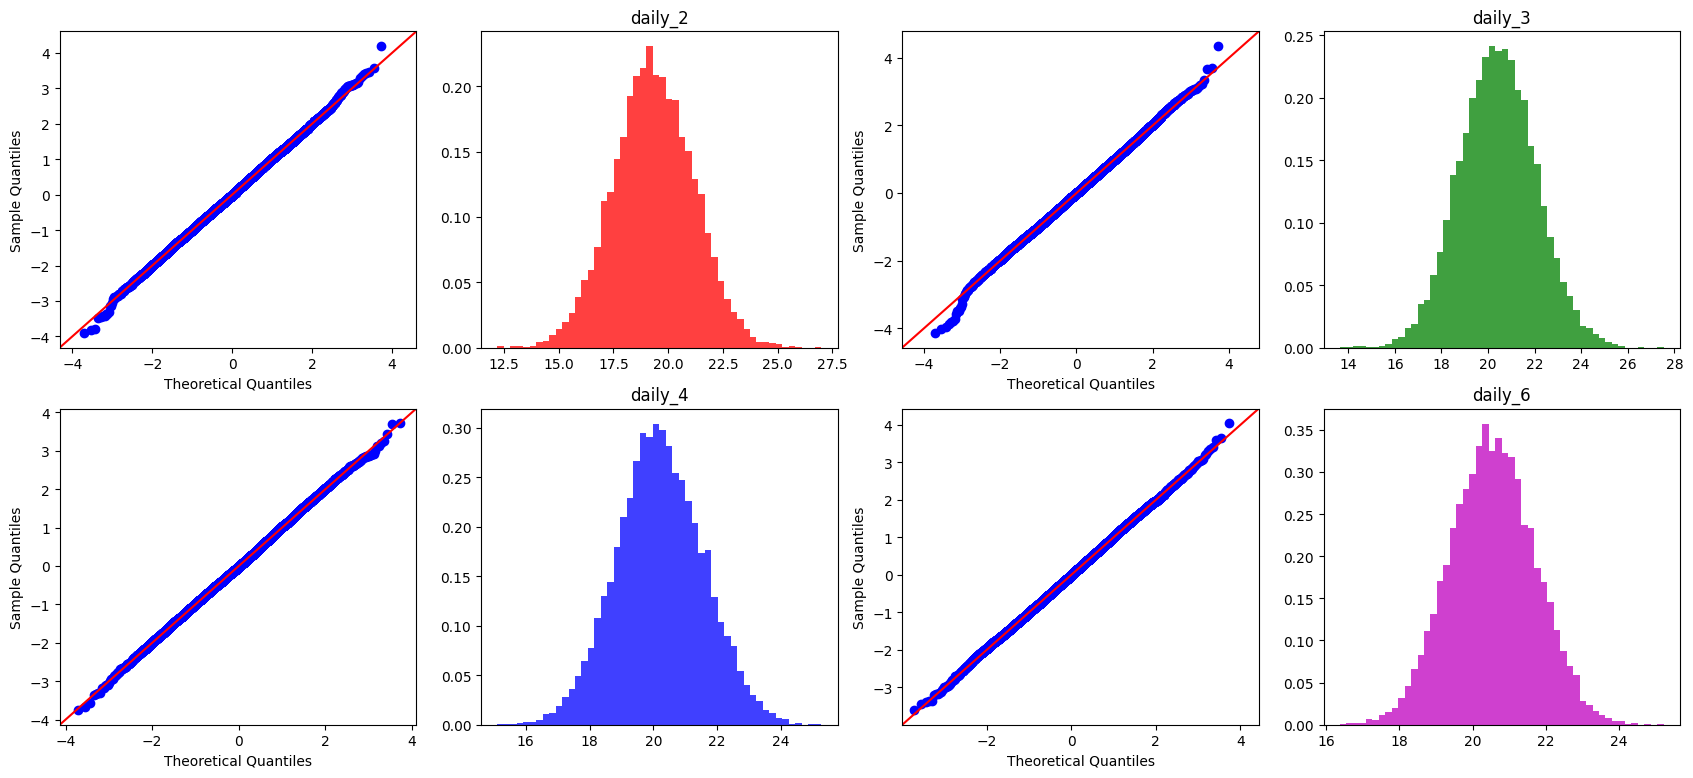

In [ ]:
fig = plt.figure(figsize=(17, 15))

ax = fig.add_subplot(4, 4, 1)
sm.graphics.qqplot(df['mean_daily_2_z'], line ='45', ax=ax)

ax = fig.add_subplot(4, 4, 2)
ax.hist(df['mean_daily_2'], 50, density=True, facecolor='r', alpha=0.75)
ax.set_title("daily_2")

ax = fig.add_subplot(4, 4, 3)
sm.graphics.qqplot(df['mean_daily_3_z'], line ='45', ax=ax)

ax = fig.add_subplot(4, 4, 4)
ax.hist(df['mean_daily_3'], 50, density=True, facecolor='g', alpha=0.75)
ax.set_title("daily_3")

ax = fig.add_subplot(4, 4, 5)
sm.graphics.qqplot(df['mean_daily_4_z'], line ='45', ax=ax)

ax = fig.add_subplot(4, 4, 6)
ax.hist(df['mean_daily_4'], 50, density=True, facecolor='b', alpha=0.75)
ax.set_title("daily_4")

ax = fig.add_subplot(4, 4, 7)
sm.graphics.qqplot(df['mean_daily_6_z'], line ='45', ax=ax)

ax = fig.add_subplot(4, 4, 8)
ax.hist(df['mean_daily_6'], 50, density=True, facecolor='m', alpha=0.75)
ax.set_title("daily_6")


fig.tight_layout()

In [ ]:
def print_rez_ttest():
  print(f'''statistic = {statistic}
pval = {pval}''')
  if pval >= 0.05: print('Cреднее значение совокупности набор1 равно набор2')
  else: print('среднее значение совокупности набор1 отличается от набор2')

In [ ]:
statistic, pval = stats.ttest_ind(data_A, df['mean_daily_2'])
print_rez_ttest()

statistic = -0.6556969039740428
pval = 0.5120267044092124
Cреднее значение совокупности набор1 равно набор2


In [ ]:
statistic, pval = stats.ttest_ind(data_A, df['mean_daily_3'])
print_rez_ttest()

statistic = -36.00668475460084
pval = 3.8116297191541545e-275
среднее значение совокупности набор1 отличается от набор2


In [ ]:
statistic, pval = stats.ttest_ind(data_A, df['mean_daily_4'])
print_rez_ttest()

statistic = -30.553500713417943
pval = 2.0176569851914696e-200
среднее значение совокупности набор1 отличается от набор2


In [ ]:
statistic, pval = stats.ttest_ind(data_A, df['mean_daily_6'])
print_rez_ttest()

statistic = -43.32627387871354
pval = 0.0
среднее значение совокупности набор1 отличается от набор2


#Графики

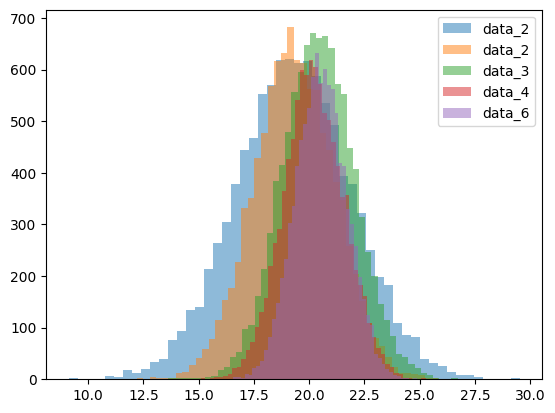

In [ ]:
plt.hist(df['data_A'], bins=50, alpha=0.5, label='data_2')
plt.hist(df['mean_daily_2'], bins=50, alpha=0.5, label='data_2')
plt.hist(df['mean_daily_3'], bins=50, alpha=0.5, label='data_3')
plt.hist(df['mean_daily_4'], bins=50, alpha=0.5, label='data_4')
plt.hist(df['mean_daily_6'], bins=50, alpha=0.5, label='data_6')
plt.legend(loc='upper right')
plt.show()

In [ ]:
df.columns

Index(['mean_daily_2', 'mean_daily_3', 'mean_daily_4', 'mean_daily_6',
       'ptp_mean_daily_2', 'ptp_mean_daily_3', 'ptp_mean_daily_4',
       'ptp_mean_daily_6', 'mean_daily_2_z', 'mean_daily_3_z',
       'mean_daily_4_z', 'mean_daily_6_z', 'data_A'],
      dtype='object')

In [ ]:
df = df.rename(columns = {'mean_daily_2':'A_2', 'mean_daily_3':'A_3', 'mean_daily_4':'A_4',
                          'mean_daily_6':'A_6','data_A':'A'})

df

,A_2,A_3,A_4,A_6,ptp_mean_daily_2,ptp_mean_daily_3,ptp_mean_daily_4,ptp_mean_daily_6,mean_daily_2_z,mean_daily_3_z,mean_daily_4_z,mean_daily_6_z,A
0,22.2003,20.6235,19.9011,21.2720,0.5230,2.1774,4.3435,7.3733,1.575,0.127,-0.224,0.632,20.603143
1,23.3479,22.0959,19.9919,22.0304,0.5218,2.3683,4.1012,8.6938,2.204,1.026,-0.157,1.289,18.953469
2,21.7546,19.3120,20.8800,20.2407,0.3779,8.2980,6.8192,7.5396,1.331,-0.674,0.497,-0.261,20.995375
3,19.5953,20.7194,20.2503,19.0858,2.5653,3.3390,10.3346,5.1388,0.147,0.185,0.033,-1.262,23.269512
4,20.1246,19.8920,20.9577,20.2821,1.1978,2.4634,5.0609,7.8705,0.437,-0.320,0.554,-0.226,18.704350
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,16.7106,20.5948,18.3312,22.6866,4.9101,7.3163,4.6795,6.5498,-1.435,0.109,-1.381,1.858,22.692943
9996,19.8013,21.5249,21.6308,21.6176,5.5459,4.6164,5.3684,6.7238,0.260,0.677,1.050,0.932,14.120980
9997,20.5148,18.6029,21.4939,21.9881,7.7439,4.9040,3.1766,6.3141,0.651,-1.107,0.950,1.253,17.480267
9998,17.2621,19.4765,20.0531,18.1168,5.1782,4.9042,3.6254,4.1988,-1.133,-0.573,-0.112,-2.102,20.600679


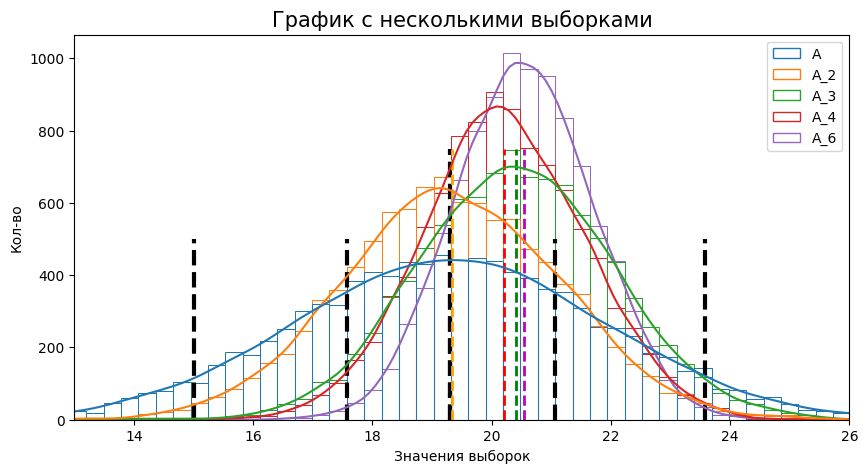

In [ ]:
fig, axes = plt.subplots(figsize=(10, 5))
l = ['A','A_2','A_3','A_4','A_6']
sns.histplot(data=df[l], bins=70, kde=True,fill=False)#hue="species", element="poly"
axes.set(xlabel='Значения выборок', ylabel='Кол-во')
axes.set_xlim(13, 26)
axes.set_title('График с несколькими выборками', size=15)

l = [np.percentile(df['A'], i) for i in [5,25,50,75,95]]
axes.vlines(l, 0, 500, color='k', lw=3, linestyles="dashed")
axes.vlines([df['A'].mean()], 0, 750, color='k', lw=3, linestyles="dashed")
axes.vlines([df['A_2'].mean()], 0, 750, color='orange', lw=2, linestyles="dashed")
axes.vlines([df['A_3'].mean()], 0, 750, color='g', lw=2, linestyles="dashed")
axes.vlines([df['A_4'].mean()], 0, 750, color='r', lw=2, linestyles="dashed")
axes.vlines([df['A_6'].mean()], 0, 750, color='m', lw=2, linestyles="dashed")

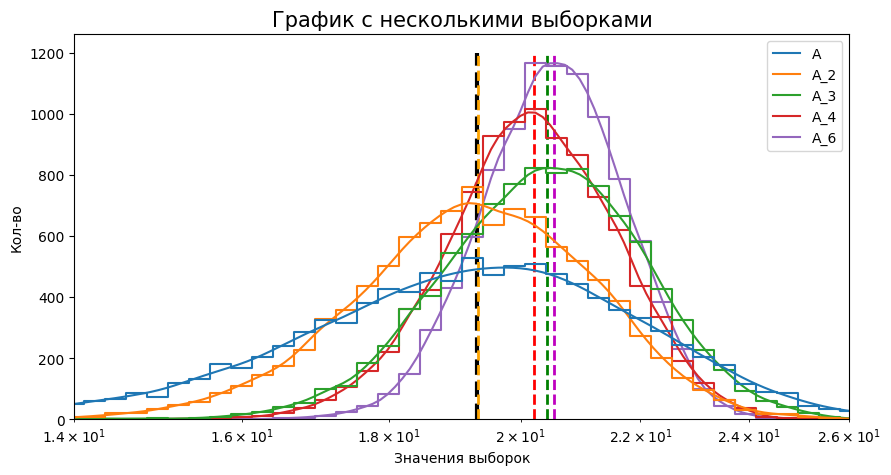

In [ ]:
fig, axes = plt.subplots(figsize=(10, 5))
l = ['A','A_2','A_3','A_4','A_6']
sns.histplot(data=df[l], bins=70, kde=True, log_scale=True, element="step", fill=False)#hue="species", element="poly"
axes.set(xlabel='Значения выборок', ylabel='Кол-во')
axes.set_xlim(14, 26)
axes.set_title('График с несколькими выборками', size=15)
axes.vlines([df['A'].mean()], 0, 1200, color='k', lw=3, linestyles="dashed")
axes.vlines([df['A_2'].mean()], 0, 1200, color='orange', lw=2, linestyles="dashed")
axes.vlines([df['A_3'].mean()], 0, 1200, color='g', lw=2, linestyles="dashed")
axes.vlines([df['A_4'].mean()], 0, 1200, color='r', lw=2, linestyles="dashed")
axes.vlines([df['A_6'].mean()], 0, 1200, color='m', lw=2, linestyles="dashed")

In [ ]:
df

,A_2,A_3,A_4,A_6,ptp_mean_daily_2,ptp_mean_daily_3,ptp_mean_daily_4,ptp_mean_daily_6,mean_daily_2_z,mean_daily_3_z,mean_daily_4_z,mean_daily_6_z,A
0,22.2003,20.6235,19.9011,21.2720,0.5230,2.1774,4.3435,7.3733,1.575,0.127,-0.224,0.632,20.603143
1,23.3479,22.0959,19.9919,22.0304,0.5218,2.3683,4.1012,8.6938,2.204,1.026,-0.157,1.289,18.953469
2,21.7546,19.3120,20.8800,20.2407,0.3779,8.2980,6.8192,7.5396,1.331,-0.674,0.497,-0.261,20.995375
3,19.5953,20.7194,20.2503,19.0858,2.5653,3.3390,10.3346,5.1388,0.147,0.185,0.033,-1.262,23.269512
4,20.1246,19.8920,20.9577,20.2821,1.1978,2.4634,5.0609,7.8705,0.437,-0.320,0.554,-0.226,18.704350
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,16.7106,20.5948,18.3312,22.6866,4.9101,7.3163,4.6795,6.5498,-1.435,0.109,-1.381,1.858,22.692943
9996,19.8013,21.5249,21.6308,21.6176,5.5459,4.6164,5.3684,6.7238,0.260,0.677,1.050,0.932,14.120980
9997,20.5148,18.6029,21.4939,21.9881,7.7439,4.9040,3.1766,6.3141,0.651,-1.107,0.950,1.253,17.480267
9998,17.2621,19.4765,20.0531,18.1168,5.1782,4.9042,3.6254,4.1988,-1.133,-0.573,-0.112,-2.102,20.600679


In [ ]:
ptp_A_2 = df['ptp_mean_daily_2'].mean()
ptp_A_3 = df['ptp_mean_daily_3'].mean()
ptp_A_4 = df['ptp_mean_daily_4'].mean()
ptp_A_6 = df['ptp_mean_daily_6'].mean()

mean_A = round(df['A'].mean(),2)
mean_A_2 = round(df['A_2'].mean(),2)
mean_A_3 = round(df['A_3'].mean(),2)
mean_A_4 = round(df['A_4'].mean(),2)
mean_A_6 = round(df['A_6'].mean(),2)

Vs_2_f = round(ptp_A_2/ (1.13 * mean_A_2)*100,2)
Vs_3_f = round(ptp_A_3/ (1.69 * mean_A_3)*100,2)
Vs_4_f = round(ptp_A_4/ (2.06 * mean_A_4)*100,2)
Vs_6_f = round(ptp_A_6/ (2.50 * mean_A_6)*100,2)

Vs_A = round(df['A'].std()/ mean_A*100,2)
Vs_2 = round(df['A_2'].std()/ mean_A_2*100,2)
Vs_3 = round(df['A_3'].std()/ mean_A_3*100,2)
Vs_4 = round(df['A_4'].std()/ mean_A_4*100,2)
Vs_6 = round(df['A_6'].std()/ mean_A_6*100,2)


percentile_A = round(np.percentile(df['A'], 5),2)
percentile_A_2 = round(np.percentile(df['A_2'], 5),2)
percentile_A_3 = round(np.percentile(df['A_3'], 5),2)
percentile_A_4 = round(np.percentile(df['A_4'], 5),2)
percentile_A_6 = round(np.percentile(df['A_6'], 5),2)


ddd = pd.DataFrame({"Vs_A": [Vs_A, 13.5], "Vs_2_f": [Vs_2_f, 13.5],"Vs_3_f": [Vs_3_f, 13.5],"Vs_4_f": [Vs_4_f, 13.5],
                    "Vs_6_f": [Vs_6_f, 13.5],"Vs_2": [Vs_2, 13.5],"Vs_3": [Vs_3, 13.5],"Vs_4": [Vs_4, 13.5],
                    "Vs_6": [Vs_6, 13.5], "mean_A": [mean_A, 19.31], "mean_A_2": [mean_A_2, 19.31],
                    "mean_A_3": [mean_A_3, 19.31], "mean_A_4": [mean_A_4, 19.31], "mean_A_6": [mean_A_6, 19.31],
                    "percentile_A": [percentile_A, 15.01], "percentile_A_2": [percentile_A_2, 15.01],
                    "percentile_A_3": [percentile_A_3, 15.01], "percentile_A_4": [percentile_A_4, 15.01],
                    "percentile_A_6": [percentile_A_6, 15.01]
                    }, index = ['s_1', 's_2'])

ddd

,Vs_A,Vs_2_f,Vs_3_f,Vs_4_f,Vs_6_f,Vs_2,Vs_3,Vs_4,Vs_6,mean_A,mean_A_2,mean_A_3,mean_A_4,mean_A_6,percentile_A,percentile_A_2,percentile_A_3,percentile_A_4,percentile_A_6
s_1,13.5,13.36,12.82,12.82,12.78,9.44,8.02,6.72,5.62,19.31,19.33,20.42,20.21,20.54,15.01,16.31,17.77,17.99,18.66
s_2,13.5,13.50,13.50,13.50,13.50,13.50,13.50,13.50,13.50,19.31,19.31,19.31,19.31,19.31,15.01,15.01,15.01,15.01,15.01


In [ ]:
ddd.loc['Difference'] = ddd.apply(lambda x: round(x["s_1"] - x["s_2"],2))

ddd

,Vs_A,Vs_2_f,Vs_3_f,Vs_4_f,Vs_6_f,Vs_2,Vs_3,Vs_4,Vs_6,mean_A,mean_A_2,mean_A_3,mean_A_4,mean_A_6,percentile_A,percentile_A_2,percentile_A_3,percentile_A_4,percentile_A_6
s_1,13.5,13.36,12.82,12.82,12.78,9.44,8.02,6.72,5.62,19.31,19.33,20.42,20.21,20.54,15.01,16.31,17.77,17.99,18.66
s_2,13.5,13.50,13.50,13.50,13.50,13.50,13.50,13.50,13.50,19.31,19.31,19.31,19.31,19.31,15.01,15.01,15.01,15.01,15.01
Difference,0.0,-0.14,-0.68,-0.68,-0.72,-4.06,-5.48,-6.78,-7.88,0.00,0.02,1.11,0.90,1.23,0.00,1.30,2.76,2.98,3.65
